In [7]:
# importing libraries
using FFTW
using CSV
using Tables
using Plots
using DSP

In [2]:
# importing MIT-BIH data; data 100, converted with the physionet stuff
ecg = CSV.File("100.mitbih") |> Tables.matrix
ecg

650000×3 Array{Float64,2}:
    0.0    -0.145  -0.065
    0.003  -0.145  -0.065
    0.006  -0.145  -0.065
    0.008  -0.145  -0.065
    0.011  -0.145  -0.065
    0.014  -0.145  -0.065
    0.017  -0.145  -0.065
    0.019  -0.145  -0.065
    0.022  -0.12   -0.08
    0.025  -0.135  -0.08
    0.028  -0.145  -0.085
    0.031  -0.15   -0.085
    0.033  -0.16   -0.075
    ⋮              
 1805.52    0.38    0.57
 1805.53    0.645   0.64
 1805.53    0.825   0.565
 1805.53    0.92    0.33
 1805.53    0.895  -0.03
 1805.54    0.72   -0.37
 1805.54    0.375  -0.51
 1805.54   -0.075  -0.48
 1805.54   -0.445  -0.41
 1805.55   -0.675  -0.365
 1805.55   -0.765  -0.335
 1805.55   -1.28    0.0

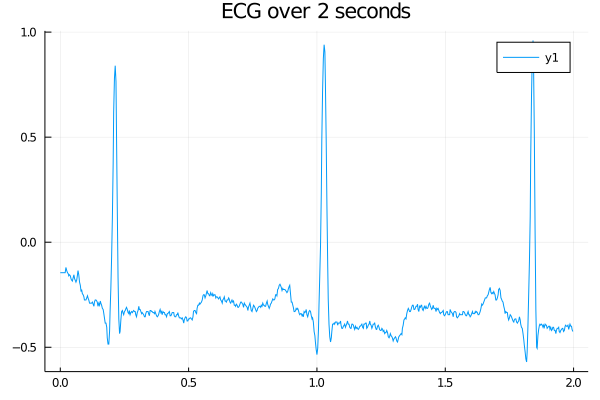

In [3]:
# create a plot of an ecg for 4 seconds
secs = 2
plot(ecg[1:(secs*360),1], ecg[(1:secs*360),2], title="ECG over 2 seconds")

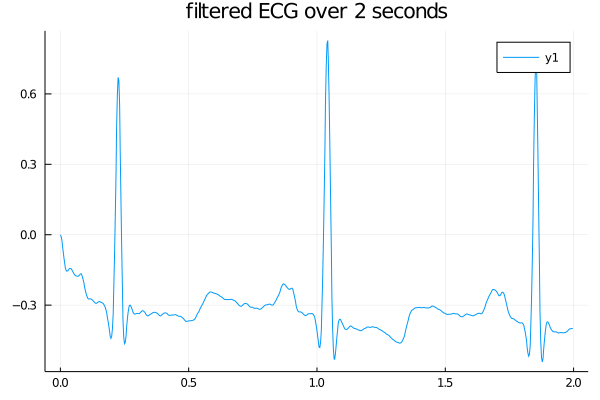

In [4]:
filter = digitalfilter(Lowpass(0.15), Butterworth(3))
plot(ecg[1:(secs*360),1], filt(filter, ecg[(1:secs*360),2]), title="filtered ECG over 2 seconds")

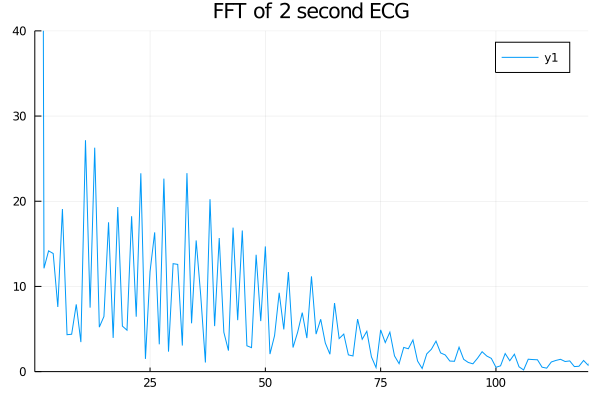

In [5]:
# get the fast fourier transform of the signal
F = rfft(ecg[1:(secs*360),2])
plot(abs.(F), title="FFT of 2 second ECG")
ylims!((0,40))
xlims!((0.01,120))

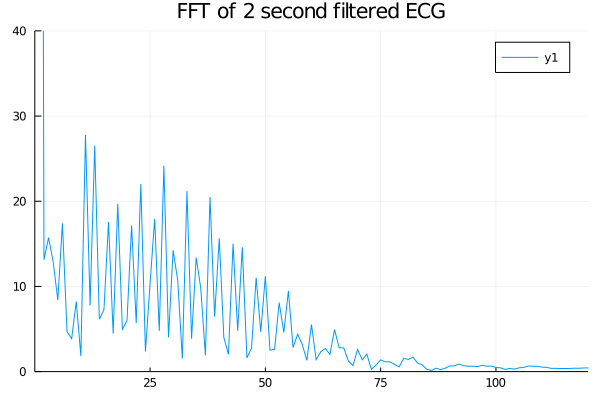

In [6]:
F = rfft(filt(filter, ecg[1:(secs*360),2]))
plot(abs.(F), title="FFT of 2 second filtered ECG")
ylims!((0,40))
xlims!((0.01,120))

# Action Plan

1. play around with ecgs and FFT in Julia -- take the Prasad Paper and AHA papers into consideration
2. take python and superimpose all 12 lines over each other--interpolate the graphs